**0. ВЗГЛЯНЕМ НА ДАННЫЕ**

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("train_data.csv")

In [4]:
target = pd.read_csv("train_target.csv")

In [5]:
data.head()

,index,id,date,bedrooms_number,batchrooms_number,square_footage_home,square_footage_lot,floors_number,has_waterfront,has_been_viewed,condition_quality,housing_unity_grade,square_footage_except_basement,square_footage_only_basement,build_year,renovation_year,coordinate_latitude,coordinate_longitude,square_footage_home_old,square_footage_lot_old
0,0,16530,2014-05-02,2,2.00,1350,2560,1.0,0,0,3,8,1350,0,1976,0,200.6344,4.893,1790,2560
1,1,3651,2014-05-02,3,1.75,1800,23103,1.0,0,0,3,7,1800,0,1968,0,200.6517,5.094,1410,18163
2,2,13568,2014-05-02,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,0,200.6954,4.708,1570,10578
3,3,20352,2014-05-02,4,2.00,1820,5000,1.5,0,1,3,7,1640,180,1945,0,200.6815,4.731,2060,5000
4,4,10524,2014-05-02,4,1.75,1560,8700,1.0,0,0,4,7,1560,0,1967,0,200.7274,4.819,2080,8000


**1 МИНИМАЛЬНАЯ ОБРАБОТКА. РАЗДЕЛЕНИЕ НА ОБУЧЕНИЕ И КОНТРОЛЬ**

Дату можно удалить, так как скорее всего это дата выхода на рынок (дата постройки дома есть и это как раз в теории должно влиять на ответ). Также можно удалить id и индекс.

Разделим датасет train_test_split с размером X_test = 0.25Data

In [6]:
target = target.drop(columns=['index'])

In [7]:
data = data.drop(columns=['index', 'id', 'date'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

In [10]:
import ensembles as ens

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

**2 RANDOM FOREST в зависимости от *n_estimators, feature_subsample_size, max_depth* .**

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
X_train.shape

(12960, 17)

In [40]:
%%time
error_list = []
time_list = []

feature_subsample_size_array = np.arange(1, X_train.shape[1] + 1)

for fss in feature_subsample_size_array:
    ob = ens.RandomForestMSE(n_estimators=1,feature_subsample_size=fss)
    time_list.append(ob.fit(X_train, y_train))
    y_pred = ob.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Wall time: 331 ms


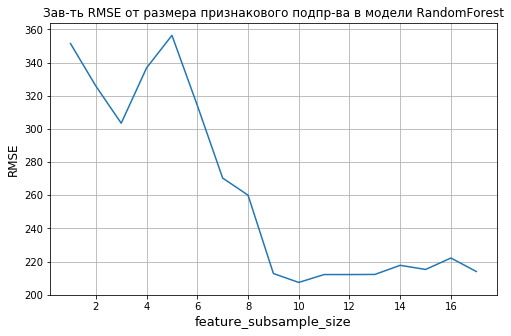

In [41]:
fig = plt.figure(figsize=(8, 5))

plt.plot(feature_subsample_size_array, error_list)

plt.grid()
plt.title("Зав-ть RMSE от размера признакового подпр-ва в модели RandomForest")
plt.xlabel("feature_subsample_size", fontsize=13)
plt.ylabel("RMSE", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("2_2_rmse.pdf", format="pdf", dpi=1000)

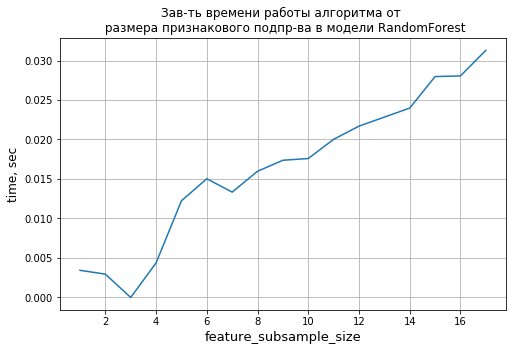

In [42]:
fig = plt.figure(figsize=(8, 5))

plt.plot(feature_subsample_size_array, time_list)

plt.grid()
plt.title("Зав-ть времени работы алгоритма от \n размера признакового подпр-ва в модели RandomForest")
plt.xlabel("feature_subsample_size", fontsize=13)
plt.ylabel("time, sec", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("2_2_time.pdf", format="pdf", dpi=1000)

In [22]:
%%time
error_list = []
time_list = []

estimators_array = np.concatenate((np.arange(1,10), np.arange(10, 100 , 10), np.arange(100, 300, 50)))
#np.arange(1, 300)

for n_estimators in estimators_array:
    ob = ens.RandomForestMSE(n_estimators, feature_subsample_size=1)
    time_list.append(ob.fit(X_train, y_train))
    y_pred = ob.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Wall time: 8.84 s


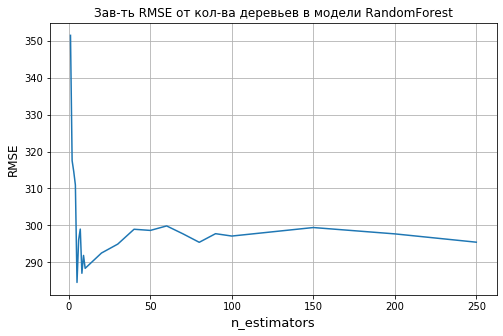

In [23]:
fig = plt.figure(figsize=(8, 5))

plt.plot(estimators_array, error_list)

plt.grid()
plt.title("Зав-ть RMSE от кол-ва деревьев в модели RandomForest")
plt.xlabel("n_estimators", fontsize=13)
plt.ylabel("RMSE", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("2_1_rmse.pdf", format="pdf", dpi=1000)

In [24]:
estimators_array[np.argmin(error_list)]

5

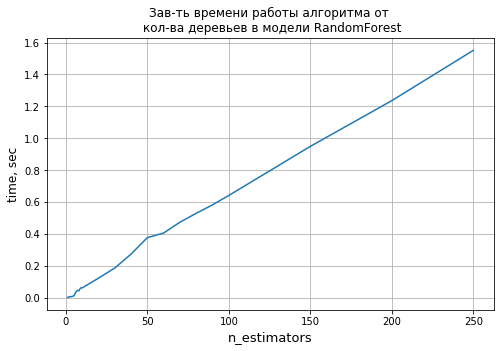

In [21]:
fig = plt.figure(figsize=(8, 5))

plt.plot(estimators_array, time_list)

plt.grid()
plt.title("Зав-ть времени работы алгоритма от \n кол-ва деревьев в модели RandomForest")
plt.xlabel("n_estimators", fontsize=13)
plt.ylabel("time, sec", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("2_1_time.pdf", format="pdf", dpi=1000)

In [25]:
%%time
error_list = []
time_list = []

max_depth_array = np.arange(1, 18)

for max_depth in max_depth_array:
    ob = ens.RandomForestMSE(n_estimators=5, feature_subsample_size=1, max_depth=max_depth)
    time_list.append(ob.fit(X_train, y_train))
    y_pred = ob.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Wall time: 301 ms


In [26]:
ob = ens.RandomForestMSE(n_estimators=5, feature_subsample_size=1)
time_list.append(ob.fit(X_train, y_train))
y_pred = ob.predict(X_test)
error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [27]:
max_depth_array = np.arange(1, 19)

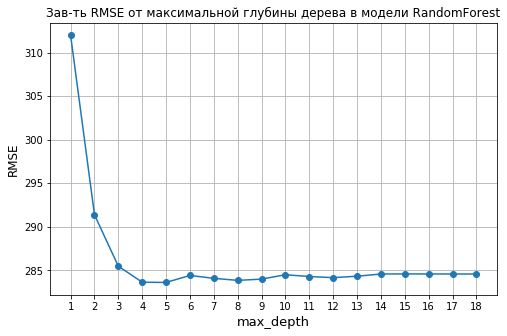

In [28]:
fig = plt.figure(figsize=(8, 5))

plt.plot(max_depth_array, error_list, marker='o')

plt.grid()
plt.title("Зав-ть RMSE от максимальной глубины дерева в модели RandomForest")
plt.xlabel("max_depth", fontsize=13)
plt.ylabel("RMSE", fontsize=12)
plt.xticks(max_depth_array)

plt.show()
fig.tight_layout()
#fig.savefig("2_3_rmse.pdf", format="pdf", dpi=1000)

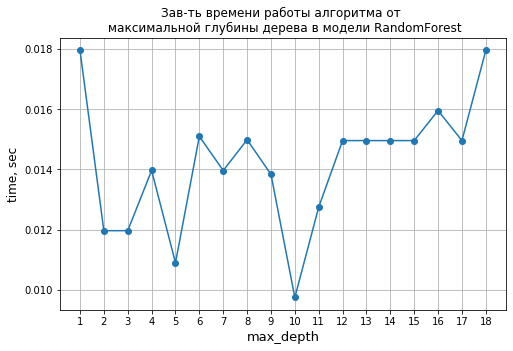

In [29]:
fig = plt.figure(figsize=(8, 5))

plt.plot(max_depth_array, time_list, marker='o')

plt.grid()
plt.title("Зав-ть времени работы алгоритма от \n максимальной глубины дерева в модели RandomForest")
plt.xlabel("max_depth", fontsize=13)
plt.ylabel("time, sec", fontsize=12)
plt.xticks(max_depth_array)

plt.show()
fig.tight_layout()
#fig.savefig("2_3_time.pdf", format="pdf", dpi=1000)

___best___

n_etimators = 5 <br>
feature_sub_s = 10 <br>
max_depth = 5

**3. GRADIENT BOOSTING в зависимости от *n_estimators, feature_subsample_size, max_depth, learning_rate* .**

In [101]:
%%time
error_list = []
time_list = []

feature_subsample_size_array = np.arange(1, X_train.shape[1])

for fss in feature_subsample_size_array:
    ob = ens.GradientBoostingMSE(n_estimators=1,feature_subsample_size=fss)
    time_list.append(ob.fit(X_train, y_train))
    y_pred = ob.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Wall time: 89.8 ms


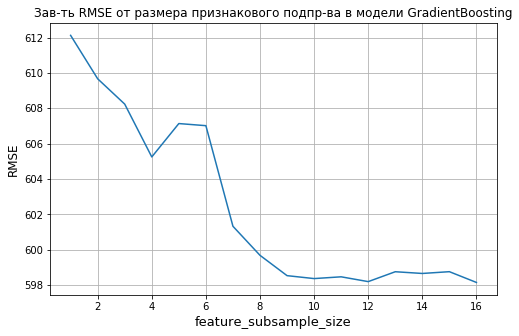

In [104]:
fig = plt.figure(figsize=(8, 5))

plt.plot(feature_subsample_size_array, error_list)

plt.grid()
plt.title("Зав-ть RMSE от размера признакового подпр-ва в модели GradientBoosting")
plt.xlabel("feature_subsample_size", fontsize=13)
plt.ylabel("RMSE", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("3_2_rmse.pdf", format="pdf", dpi=1000)

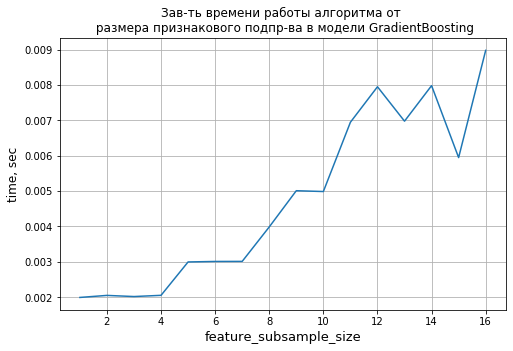

In [105]:
fig = plt.figure(figsize=(8, 5))

plt.plot(feature_subsample_size_array, time_list)

plt.grid()
plt.title("Зав-ть времени работы алгоритма от \n размера признакового подпр-ва в модели GradientBoosting")
plt.xlabel("feature_subsample_size", fontsize=13)
plt.ylabel("time, sec", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("3_2_time.pdf", format="pdf", dpi=1000)

In [57]:
%%time
error_list = []
time_list = []

estimators_array = np.concatenate((np.arange(1,10), np.arange(10, 100 , 10), np.arange(100, 300, 50)))

for n_estimators in estimators_array:
    ob = ens.GradientBoostingMSE(n_estimators, feature_subsample_size=1)
    time_list.append(ob.fit(X_train, y_train))
    y_pred = ob.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Wall time: 9.68 s


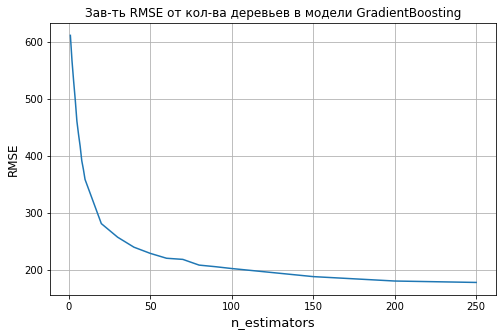

In [59]:
fig = plt.figure(figsize=(8, 5))

plt.plot(estimators_array, error_list)

plt.grid()
plt.title("Зав-ть RMSE от кол-ва деревьев в модели GradientBoosting")
plt.xlabel("n_estimators", fontsize=13)
plt.ylabel("RMSE", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("3_1_rmse.pdf", format="pdf", dpi=1000)

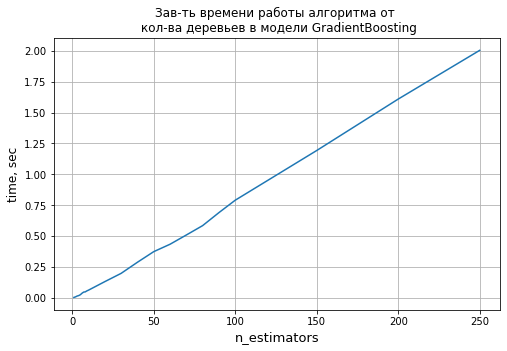

In [60]:
fig = plt.figure(figsize=(8, 5))

plt.plot(estimators_array, time_list)

plt.grid()
plt.title("Зав-ть времени работы алгоритма от \n кол-ва деревьев в модели GradientBoosting")
plt.xlabel("n_estimators", fontsize=13)
plt.ylabel("time, sec", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("3_1_time.pdf", format="pdf", dpi=1000)

In [74]:
%%time
error_list = []
time_list = []

max_depth_array = np.arange(1, 18)

for max_depth in max_depth_array:
    ob = ens.GradientBoostingMSE(n_estimators=150, feature_subsample_size=1, max_depth=max_depth)
    time_list.append(ob.fit(X_train, y_train))
    y_pred = ob.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Wall time: 24.2 s


In [75]:
ob = ens.GradientBoostingMSE(n_estimators=150, feature_subsample_size=1, max_depth=None)
time_list.append(ob.fit(X_train, y_train))
y_pred = ob.predict(X_test)
error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [76]:
max_depth_array = np.arange(1, 19)

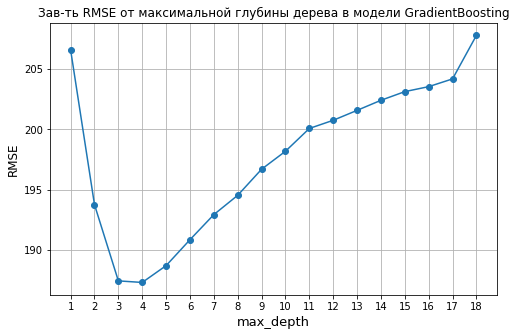

In [77]:
fig = plt.figure(figsize=(8, 5))

plt.plot(max_depth_array, error_list, marker='o')

plt.grid()
plt.title("Зав-ть RMSE от максимальной глубины дерева в модели GradientBoosting")
plt.xlabel("max_depth", fontsize=13)
plt.ylabel("RMSE", fontsize=12)
plt.xticks(max_depth_array)

plt.show()
fig.tight_layout()
#fig.savefig("3_3_rmse.pdf", format="pdf", dpi=1000)

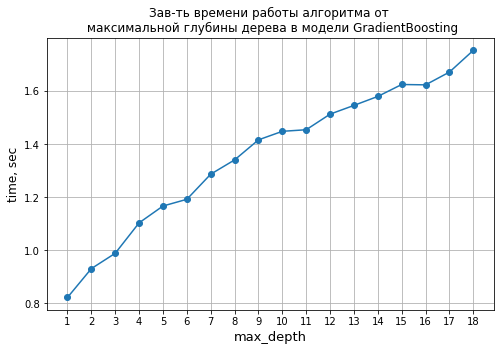

In [79]:
fig = plt.figure(figsize=(8, 5))

plt.plot(max_depth_array, time_list, marker='o')

plt.grid()
plt.title("Зав-ть времени работы алгоритма от \n максимальной глубины дерева в модели GradientBoosting")
plt.xlabel("max_depth", fontsize=13)
plt.ylabel("time, sec", fontsize=12)
plt.xticks(max_depth_array)

plt.show()
fig.tight_layout()
#fig.savefig("3_3_time.pdf", format="pdf", dpi=1000)

In [68]:
%%time
error_list = []
time_list = []

learning_rate_array = np.arange(0, 1.01, 0.05)

for lr in learning_rate_array:
    ob = ens.GradientBoostingMSE(n_estimators=150, feature_subsample_size=1, max_depth=1, learning_rate=lr)
    time_list.append(ob.fit(X_train, y_train))
    y_pred = ob.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Wall time: 19.8 s


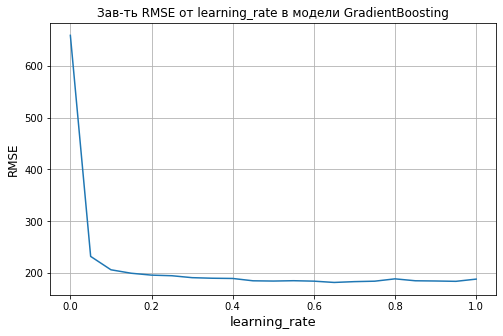

In [69]:
fig = plt.figure(figsize=(8, 5))

plt.plot(learning_rate_array, error_list)

plt.grid()
plt.title("Зав-ть RMSE от learning_rate в модели GradientBoosting")
plt.xlabel("learning_rate", fontsize=13)
plt.ylabel("RMSE", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("3_4_rmse.pdf", format="pdf", dpi=1000)

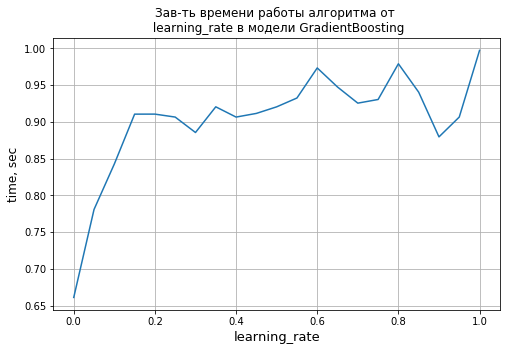

In [70]:
fig = plt.figure(figsize=(8, 5))

plt.plot(learning_rate_array, time_list)

plt.grid()
plt.title("Зав-ть времени работы алгоритма от \n learning_rate в модели GradientBoosting")
plt.xlabel("learning_rate", fontsize=13)
plt.ylabel("time, sec", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("3_4_time.pdf", format="pdf", dpi=1000)

В связи с неинформативным по моему мнению исследовать fss при кол-ве деревьев = 1, проверем на оптимальных 50 деревьях

In [71]:
%%time
error_list = []
time_list = []

feature_subsample_size_array = np.arange(1, X_train.shape[1])

for fss in feature_subsample_size_array:
    ob = ens.GradientBoostingMSE(n_estimators=150,feature_subsample_size=fss)
    time_list.append(ob.fit(X_train, y_train))
    y_pred = ob.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Wall time: 51.9 s


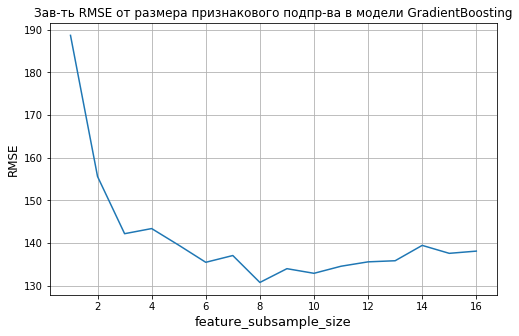

In [72]:
fig = plt.figure(figsize=(8, 5))

plt.plot(feature_subsample_size_array, error_list)

plt.grid()
plt.title("Зав-ть RMSE от размера признакового подпр-ва в модели GradientBoosting")
plt.xlabel("feature_subsample_size", fontsize=13)
plt.ylabel("RMSE", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("3_2_rmse_cor.pdf", format="pdf", dpi=1000)

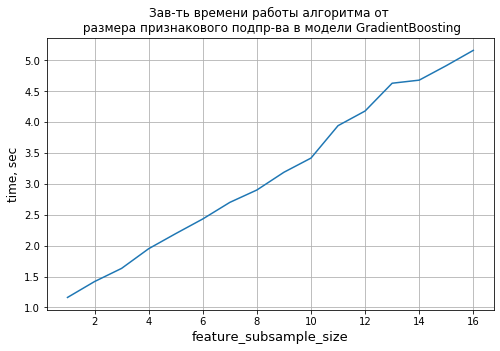

In [73]:
fig = plt.figure(figsize=(8, 5))

plt.plot(feature_subsample_size_array, time_list)

plt.grid()
plt.title("Зав-ть времени работы алгоритма от \n размера признакового подпр-ва в модели GradientBoosting")
plt.xlabel("feature_subsample_size", fontsize=13)
plt.ylabel("time, sec", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("3_2_time_cor.pdf", format="pdf", dpi=1000)

__best__

learning_rate = 0.1
max_depth = 3
feature_sub = 10
estimators = 150

In [124]:
qq = ens.RandomForestMSE(5,5,10)
t1 = qq.fit(X_train, y_train)
pred = qq.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

170.08446483187038

In [125]:
t1

0.07161831855773926

In [116]:
best = ens.GradientBoostingMSE(150, max_depth=3, feature_subsample_size=10, learning_rate=0.1)
t2 = best.fit(X_train, y_train)
pred = best.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

140.96131460979146

In [117]:
t2

2.427546501159668

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [95]:
k_list = np.arange(1,45)
error_list = []

for k in k_list:
    ne = KNeighborsRegressor(n_neighbors=k, weights='distance', n_jobs=-1)
    ne.fit(X_train, y_train)
    pred = ne.predict(X_test)
    error_list.append(np.sqrt(mean_squared_error(y_test, pred)))

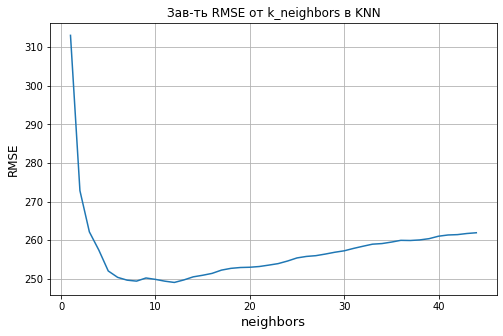

In [96]:
fig = plt.figure(figsize=(8, 5))

plt.plot(k_list, error_list)

plt.grid()
plt.title("Зав-ть RMSE от k_neighbors в KNN")
plt.xlabel("neighbors", fontsize=13)
plt.ylabel("RMSE", fontsize=12)

plt.show()
fig.tight_layout()
#fig.savefig("gg_rmse_cor.pdf", format="pdf", dpi=1000)